# Armijo line search examples

Consider the problem 

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1,x_2) = 4x_1^2 + 3x_1x_2 + x_2^2\\
	\end{aligned}
\end{equation*}

having a gradient $$ \nabla f(\mathbf{x}) = \begin{bmatrix} 8x_1 + 3x_2 \\ 3x_1 + 2x_2 \end{bmatrix}$$

and an optimal solution $\mathbf{x}^* = (0,0)$

We define the function `f` and its gradient `grad_f` using the below inline functions 

In [8]:
import numpy as np

f = lambda x: 4*x[0,:]**2 + 3*x[0,:]**1*x[1,:]**1 + x[1,:]**2
grad_f = lambda x: np.array([[8*x[0,:] + 3*x[1,:]], [3*x[0,:] + 2*x[1,:]]])

We also generate a grid of points where $-3 \leq x_1 \leq 3$ and $-3 \leq x_2 \leq 2$ to visualize this function using a contour map

In [9]:

import matplotlib.pyplot as plt
from matplotlib import cm

X1,X2 = np.meshgrid(np.linspace(-3,3,40),np.linspace(-3,2,40))
X = np.vstack((X1.reshape([1,-1]),X2.reshape([1,-1]))) # flatten grids side-by-side

Z = f(X)
Z_grad = grad_f(X)

Let us choose a starting point 
$$\mathbf{x}_0 = \left(1.0,-2.0\right)$$
This gives a steepest descent direction 
$$\mathbf{d}_0=-\nabla f(\mathbf{x}_0) = \begin{bmatrix}-2 & 1\end{bmatrix}^\mathrm{T}$$

We plot the function (given by isocontours), the initial point $\mathbf{x}_0$, the true minimizer $\mathbf{x}^*$, the gradient vector $\nabla f(\mathbf{x}_k)$ and the steepest decent direction $-\nabla f(\mathbf{x}_k)$ below

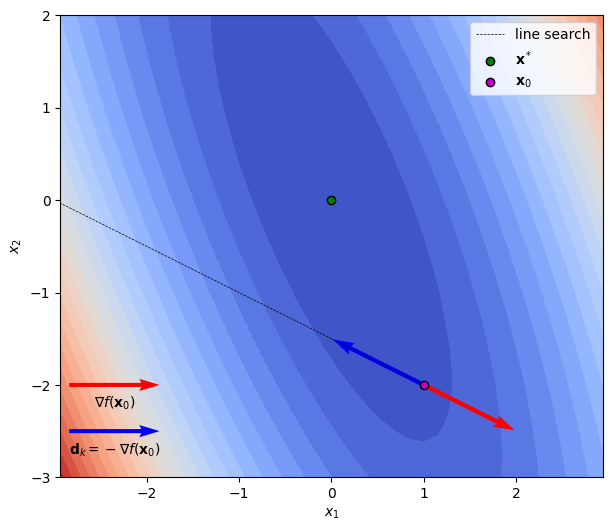

In [10]:
x0 = np.array([1,-2])
grad_f0 = grad_f(x0[:,None]).squeeze()
d0 = -grad_f0

origin = np.array([x0]*2).T # origin point
vectors = np.array([grad_f0, -grad_f0])

fig, ax = plt.subplots(figsize=(7,6))
# plot
ax.contourf(X1, X2, Z.reshape(X1.shape),cmap=cm.coolwarm,levels=25,zorder=-1)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=12, zorder=1)
ax.quiverkey(Q, 0.1, 0.2, 2, r"$\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=12, zorder=1)
ax.quiverkey(Q, 0.1, 0.1, 2, r"$\mathbf{d}_k = -\nabla f(\mathbf{x}_0)$", labelpos='S', coordinates='axes')
ax.plot([x0[0],x0[0] + 10*d0[0]], [x0[1],x0[1] + 10*d0[1]], color="k", label="line search", linewidth=0.5, linestyle="--",zorder=2)
ax.scatter([0,], [0,], marker="o", color="g", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
ax.scatter([x0[0],], [x0[1],], marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}_0$",zorder=3)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.axis('equal')
ax.set_xlim((-2,2))
ax.set_ylim((-3,2))
ax.legend()
fig.canvas.draw()
# fig.savefig("linesearch_ex1_contours.pdf",bbox_inches="tight")

Lets us examine how the function changes its value along the search direction $\mathbf{d}_k$

$$\phi(\alpha) = f(\mathbf{x}_{k+1}) = f(\mathbf{x}_k + \alpha \mathbf{d}_k)$$

We also note that
$$
\phi'(\alpha) = f'(\mathbf{x}_k + \alpha \mathbf{d}_k) = \nabla f(\mathbf{x}_k + \alpha \mathbf{d}_k)^\mathrm{T} \mathbf{d}_k,
$$ 
from the chain rule

Let $\mathbf{x}_{1}$ be the next iterate, let us examine how $f(\mathbf{x}_{1})$ changes along the search direction $\mathbf{d}_0=-\nabla^{\mathrm{T}}f(\mathbf{x_0})$ at the current iterate $\mathbf{x}_0$. We derive an expression for $\phi(\alpha)$ at $\mathbf{x_0}$

$$\phi(\alpha) = f(\mathbf{x}_{1}) = f(\mathbf{x}_0 + \alpha \mathbf{d}_0)$$

and its derivative

$$\phi'(\alpha) = \nabla f(\mathbf{x}_1 + \alpha \mathbf{d}_0)^\mathrm{T} \mathbf{d}_0$$

We use the below symbolic expression to find the analytical equations representing $\phi(\alpha)$ and $\phi'(\alpha)$ by substituting $\mathbf{x}_0 + \alpha \mathbf{d}_0$ into $f$ and $\nabla f$

In [11]:
import sympy as sym
import sympy.physics.vector as spv
from sympy import pprint
from sympy.plotting import plot

a = sym.Symbol(r"\alpha")
x1 = sym.Symbol(r"x_1")
x2 = sym.Symbol(r"x_2")

f_sym = 4*x1**2 + 3*x1**1*x2**1 + x2**2
display(f_sym)

# try the gradient approach
gradf_sym = sym.Matrix([sym.diff(f_sym,x1),sym.diff(f_sym,x2)])
display(gradf_sym)

# substitute direction
f_sym = f_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
display(f_sym.simplify())
gradf_sym = gradf_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
display(gradf_sym)

df_sym=gradf_sym.dot(sym.Matrix([d0[0],d0[1]]))
display(df_sym.simplify())

# differentiate and set equal to 0 to find alpha_min
a_min = sym.solve(df_sym,  a)[0]
display(a_min)
a_min = float(a_min)

4*x_1**2 + 3*x_1*x_2 + x_2**2

Matrix([
[8*x_1 + 3*x_2],
[3*x_1 + 2*x_2]])

11*\alpha**2 - 5*\alpha + 2

Matrix([
[2 - 13*\alpha],
[-4*\alpha - 1]])

22*\alpha - 5

5/22


We will plot the following function

$$
\phi(\alpha) = f(\mathbf{x}_{1}) = f(\mathbf{x}_0 + \alpha \mathbf{d}_0) = f\left(\begin{bmatrix}1-2\alpha \\ -2 + \alpha\end{bmatrix}\right)= 13\alpha^2 - 10\alpha + 4
$$

We also note that the gradient of the above functions is given by

$$
\phi'(\alpha) = \nabla f(\mathbf{x}_1 + \alpha \mathbf{d}_0)^\mathrm{T} \mathbf{d}_0 = \nabla f^\mathrm{T} \left(\begin{bmatrix}1-2\alpha \\ -2 + \alpha\end{bmatrix}\right) \begin{bmatrix}-2 \\ 1\end{bmatrix}= 22\alpha - 5
$$

with $\alpha^*={5}/{22}$ from FONCs and SOSCs.

Armijo's rule for line search specifies the following two conditions on $\alpha$ to ensure sufficient descent (given in terms of the first-order Taylor series expansion at $\alpha=0$)

\begin{align*}
    \phi(\alpha) & \le \phi(0) + \epsilon\phi'(0)\alpha = \psi(\alpha;\epsilon)\\
    \phi(2\alpha) & \ge \phi(0) + 2\epsilon\phi'(0)\alpha = \psi(\alpha;2\epsilon)
\end{align*}

We visualize these conditions along the search direction given by the plot below.

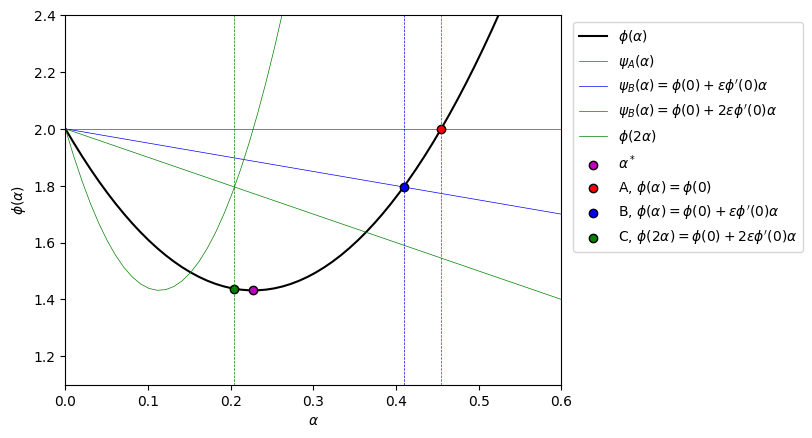

In [12]:
alpha = np.linspace(0,1.0,100)
phi = lambda alpha: f(x0[:,None] + alpha*d0[:, None])
phi_prime = lambda alpha: grad_f(x0[:,None] + alpha*d0[:, None]).T @ d0[:, None]

e = 0.1

# find bounds for alpha
a_plot = float(sym.solve(f_sym - f_sym.subs(a,0))[1])
b_plot = float(sym.solve(f_sym - f_sym.subs(a,0) - e*df_sym.subs(a,0)*a,a)[1])
c_plot = float(sym.solve(f_sym.subs(a,2*a) - f_sym.subs(a,0) - 2*e*df_sym.subs(a,0)*a,a)[1])

fig, ax = plt.subplots()
# plot
ax.plot(alpha, phi(alpha), color="k", linewidth=1.5, linestyle="-",zorder=-1,label=r"$\phi(\alpha)$")
ax.plot(alpha, [phi(0),]*len(alpha), color="r", linewidth=0.5, linestyle="-",label=r"$\psi_A(\alpha)$",zorder=-1)
ax.plot(alpha, phi(0) + e*alpha*phi_prime(0).squeeze(), color="b", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+\epsilon\phi'(0)\alpha$",zorder=-1)
ax.plot(alpha, phi(0) + 2*e*alpha*phi_prime(0).squeeze(), color="g", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+2\epsilon\phi'(0)\alpha$",zorder=-1)
ax.plot(alpha, phi(2*alpha), color="g", linewidth=0.5, linestyle="-",zorder=-1,label=r"$\phi(2\alpha)$")

ax.scatter([a_min,], [phi(a_min),], marker="o", color="m", edgecolors="k", linestyle="None",label=r"$\alpha^*$",zorder=1)
ax.scatter([a_plot,], [phi(a_plot),], marker="o", color="r", edgecolors="k", linestyle="None",label=r"A, $\phi(\alpha) = \phi(0)$",zorder=1)
ax.scatter([b_plot,], [phi(b_plot),], marker="o", color="b", edgecolors="k", linestyle="None",label=r"B, $\phi(\alpha) = \phi(0) + \epsilon\phi'(0)\alpha$",zorder=1)
ax.scatter([c_plot,], [phi(c_plot),], marker="o", color="g", edgecolors="k", linestyle="None",label=r"C, $\phi(2\alpha) = \phi(0) + 2\epsilon\phi'(0)\alpha$",zorder=1)

ax.vlines([a_plot,b_plot,c_plot],1.1,2.4,color=["r","b","g"], linewidth=0.5, linestyle="--")

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\phi(\alpha)$")
ax.set_xlim((0,0.6))
ax.set_ylim((1.1,2.4))
ax.legend(ncol=1,loc='upper left',bbox_to_anchor=(1.01, 1.00))
fig.canvas.draw()
# fig.savefig("linesearch_ex1_projection.pdf",bbox_inches="tight")

* Case A: If $\phi(\alpha)$ exceeds $\phi(0)$, i.e., $f(\mathbf{x}_0 + \alpha\mathbf{d}_0) > f(\mathbf{x}_0)$, then no descent occurs and this represents an upper limit on the possible values of $\alpha < \alpha_A$, where $\alpha_A$ is the root of $\phi(\alpha) = \phi(0)$.

* Case B: $\alpha$ must be such that $\phi(\alpha) \le \phi(0) + \epsilon\phi'(0)\alpha$, to not be considered too large. This is a stricter upper bound on $\alpha < \alpha_B$, where $\alpha_B$ is the root of $\phi(\alpha) = \phi(0) + \epsilon\phi'(0)\alpha$.

* Case B: $\alpha$ must be such that $\phi(2\alpha) \ge \phi(0) + 2\epsilon\phi'(0)\alpha$, to not be considered too small. This is a lower bound on $\alpha > \alpha_C$, where $\alpha_C$ is the root of $\phi(2\alpha) = \phi(0) + 2\epsilon\phi'(0)\alpha$.

Any $\alpha \in (\alpha_C,\alpha_B)$ is considered an acceptable step size that provides sufficient descent.

# Interactive example

Let us now look at this example by varying $\alpha$ and $\epsilon$ interactively. We will observe:
* The effect of $\alpha$ on the next iterate $\mathbf{x}_1$ at $k=0$.
* The effect of $\epsilon$ on the acceptable range of values for alpha $(\alpha_C,\alpha_B)$.

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(alpha_next,e):
    # input parameters
    # alpha_next = 0.25
    # e = 0.1

    phi = lambda alpha: f(x0[:,None] + alpha*d0[:, None])
    phi_prime = lambda alpha: grad_f(x0[:,None] + alpha*d0[:, None]).T @ d0[:, None]

    x0 = np.array([1.0,-2.0])
    grad_f0 = grad_f(x0[:,None]).squeeze()
    d0 = -grad_f0
    x_next = x0 + alpha_next*d0

    # symbolic calculations
    f_sym = 4*x1**2 + 3*x1**1*x2**1 + x2**2

    # try the gradient approach
    gradf_sym = sym.Matrix([sym.diff(f_sym,x1),sym.diff(f_sym,x2)])

    # substitute direction
    f_sym = f_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
    gradf_sym = gradf_sym.subs({x1:x0[0]+d0[0]*a, x2: x0[1]+d0[1]*a})
    df_sym=gradf_sym.dot(sym.Matrix([d0[0],d0[1]]))

    # differentiate and set equal to 0 to find alpha_min
    a_min = float(sym.solve(df_sym,  a)[0])
    # find bounds for alpha
    a_plot = float(sym.solve(f_sym - f_sym.subs(a,0))[1])
    b_plot = float(sym.solve(f_sym - f_sym.subs(a,0) - e*df_sym.subs(a,0)*a,a)[1])
    c_plot = float(sym.solve(f_sym.subs(a,2*a) - f_sym.subs(a,0) - 2*e*df_sym.subs(a,0)*a,a)[1])

    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    # Contour map of f
    axs[0].contourf(X1, X2, Z.reshape(X1.shape),cmap=cm.coolwarm,levels=25,zorder=-1)
    axs[0].plot([x0[0],x0[0] + 10*d0[0]], [x0[1],x0[1] + 10*d0[1]], color="k", label="search direction", linewidth=0.5, linestyle="--",zorder=2)
    axs[0].scatter([x0[0],], [x0[1],], marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}_k$",zorder=3)
    axs[0].scatter([x_next[0],], [x_next[1],], marker="s", color="orange", edgecolors="k", linestyle="None",label=r"$\mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{d}_k$",zorder=3)
    axs[0].set_xlabel("$x_1$")
    axs[0].set_ylabel("$x_2$")
    axs[0].axis('equal')
    axs[0].set_xlim((-2,2))
    axs[0].set_ylim((-3,2))
    axs[0].legend()
    axs[0].set_title(r"$\mathbf{x}_{k+1}$ = (%.2f,%.2f)" %(x_next[0],x_next[1]))

    # Projection of f onto search direction
    axs[1].plot(alpha, phi(alpha), color="k", linewidth=1.5, linestyle="-",zorder=-1,label=r"$\phi(\alpha)$")
    axs[1].plot(alpha, [phi(0),]*len(alpha), color="r", linewidth=0.5, linestyle="-",label=r"$\psi_A(\alpha)$",zorder=-1)
    axs[1].plot(alpha, phi(0) + e*alpha*phi_prime(0).squeeze(), color="b", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+\epsilon\phi'(0)\alpha$",zorder=-1)
    axs[1].plot(alpha, phi(0) + 2*e*alpha*phi_prime(0).squeeze(), color="g", linewidth=0.5, linestyle="-",label=r"$\psi_B(\alpha) = \phi(0)+2\epsilon\phi'(0)\alpha$",zorder=-1)
    axs[1].plot(alpha, phi(2*alpha), color="g", linewidth=0.5, linestyle="-",zorder=-1,label=r"$\phi(2\alpha)$")

    axs[1].scatter([a_min,], [phi(a_min),], marker="o", color="m", edgecolors="k", linestyle="None",label=r"$\alpha^*$",zorder=1)
    axs[1].scatter([a_plot,], [phi(a_plot),], marker="o", color="r", edgecolors="k", linestyle="None",label=r"A, $\phi(\alpha) = \phi(0)$",zorder=1)
    axs[1].scatter([b_plot,], [phi(b_plot),], marker="o", color="b", edgecolors="k", linestyle="None",label=r"B, $\phi(\alpha) = \phi(0) + \epsilon\phi'(0)\alpha$",zorder=1)
    axs[1].scatter([c_plot,], [phi(c_plot),], marker="o", color="g", edgecolors="k", linestyle="None",label=r"C, $\phi(2\alpha) = \phi(0) + 2\epsilon\phi'(0)\alpha$",zorder=1)
    axs[1].scatter([alpha_next,], [phi(alpha_next),], marker="s", color="orange", edgecolors="k", linestyle="None",label=r"$\alpha_k$",zorder=1)
    axs[1].vlines([a_plot,b_plot,c_plot],phi(a_min)-0.1,phi(a_plot)+0.1,color=["r","b","g"], linewidth=0.5, linestyle="--")
    axs[1].set_title("%.2f $\leq alpha \leq$ %.2f" %(c_plot,b_plot))

    axs[1].set_xlabel(r"$\alpha$")
    axs[1].set_ylabel(r"$\phi(\alpha)$")
    axs[1].set_xlim((0,0.9))
    axs[1].set_ylim((phi(a_min)-0.1,phi(a_plot)+0.1))
    axs[1].legend(ncol=1,loc='upper left',bbox_to_anchor=(1.01, 1.00));

interact(plot_func, alpha_next = widgets.FloatSlider(value=0.1,min=0.0,max=.5,step=0.01,description=u"\u03B1"),
    e = widgets.FloatSlider(value=0.1,min=0.01,max=0.5,step=0.05,description=u"\u03B5"));


interactive(children=(FloatSlider(value=0.1, description='α', max=0.5, step=0.01), FloatSlider(value=0.1, desc…